In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import numpy as np

from Newmark import *
from meshes import *

from get_M import *
from get_S import *

from NumericalSolutions import *

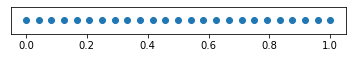

In [2]:
# Spatial resolution of mesh
N = 25

# Right limit of mesh
L = 1

# Generate 1D mesh
[nodes, elems, faces] = get_mesh_1D(N, [0,L], True);
elems = np.array(elems)[:-1,:]          # I believe there is one row too much in elems from get_mesh function

In [3]:
E=1
I=1
mu = 1

In [4]:
M0 = 0
ML = 0
QL = 0
a0 = 0
aL = 0
a = 0
b = 0

q = 1

two_sided_support = True 

if two_sided_support:
    boundary_conditions = {'M0': M0, 'ML': ML, 'a0': a0, 'aL': aL}
else:
    boundary_conditions = {'QL': QL, 'ML': ML, 'a': a, 'b': b}

In [10]:
DynamicCase = Dynamic(E=E, I=I, N=N, L=L, 
                      initial_conditions = {"ML":ML, "M0":M0, "a0":a0, "aL":aL, "q":0},
                      #parameters = {"ML":ML, "M0":M0, "a0":a0, "aL":aL, "q":4},
                      parameters = {"ML":ML, "M0":M0, "a0":0, "aL":5, "q":4},
                      two_sided_support=True)

tsteps = 100

DynamicCase.Newmark.h = 0.05
DynamicCase.Newmark.run(tsteps)

(array([ 0.00000000e+00,  1.13344705e+01,  4.70629460e-01,  1.12033178e+01,
         9.25623016e-01,  1.04905696e+01,  1.33002068e+00,  8.73938149e+00,
         1.64318251e+00,  6.25181397e+00,  1.85761791e+00,  4.24002637e+00,
         2.02006071e+00,  3.88024763e+00,  2.20508352e+00,  5.21297540e+00,
         2.46274216e+00,  7.14254903e+00,  2.79312570e+00,  8.59514001e+00,
         3.17065709e+00,  9.46816887e+00,  3.58036788e+00,  1.01870626e+01,
         4.01505376e+00,  1.05516804e+01,  4.44296520e+00,  9.74535943e+00,
         4.81051810e+00,  7.80120711e+00,  5.09765627e+00,  6.16859073e+00,
         5.34221238e+00,  5.70448830e+00,  5.56788459e+00,  4.85760912e+00,
         5.71695295e+00,  1.99332589e+00,  5.72993550e+00, -1.12511987e+00,
         5.65476198e+00, -2.18251624e+00,  5.54667886e+00, -3.29816856e+00,
         5.36631578e+00, -5.07862618e+00,  5.17625934e+00, -3.69936942e+00,
         5.00000000e+00, -5.34976618e+00,  1.12568089e+02, -1.46563401e+04]),
 array([ 0

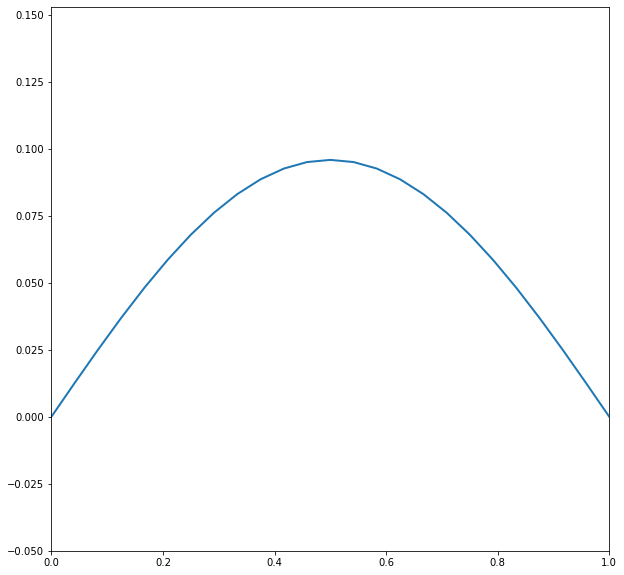

In [8]:
# get animations

%matplotlib inline

from matplotlib import animation, rc
from IPython.display import HTML


results = DynamicCase.Newmark.results
w = results["w"]

wmin = np.min(w)
wmax = np.max(w)

fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlim(( 0, L))
ax.set_ylim((wmin - 0.05 , wmax + 0.05))
#try: ax.set_ylim((np.min(-u[nsteps-1][:-2][::2])-0.5, np.max(u[nsteps-1][:-2][::2])+0.5))
#except: ax.set_ylim((np.min(-solution), np.max(solution)))
        
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    line.set_data(nodes, w[i])
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=tsteps, interval=50, 
                               blit=True)
HTML(anim.to_jshtml())